In [ ]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
os.listdir('/content/drive/MyDrive/satellite image dataset')

['water', 'cloudy', 'green_area', 'desert']

In [ ]:
data=[]
target=[]
li=['water','cloudy','green_area','desert']
datadir='/content/drive/MyDrive/satellite image dataset'
for i in li:
  print('loading..........',i)
  path=os.path.join(datadir,i)
  img=os.listdir(path)
  for image in img:
    img_path=os.path.join(path,image)
    img_array=imread(img_path)
    img_resize=resize(img_array,(150,150,1))
    data.append(img_resize)
    target.append(li.index(i))
  print('completed.........',i)

In [ ]:
X=np.array(data)
X

array([[[[0.24164626],
         [0.24189166],
         [0.24117776],
         ...,
         [0.2081892 ],
         [0.206516  ],
         [0.20709116]],

        [[0.24189166],
         [0.24230578],
         [0.24110107],
         ...,
         [0.2081892 ],
         [0.206516  ],
         [0.20709116]],

        [[0.24117776],
         [0.24110107],
         [0.24132417],
         ...,
         [0.2081892 ],
         [0.206516  ],
         [0.20709116]],

        ...,

        [[0.20785995],
         [0.20753403],
         [0.20848218],
         ...,
         [0.20102271],
         [0.20102271],
         [0.20102271]],

        [[0.2057071 ],
         [0.20562658],
         [0.20586082],
         ...,
         [0.20102271],
         [0.20102271],
         [0.20102271]],

        [[0.20644714],
         [0.20628226],
         [0.20676191],
         ...,
         [0.20102271],
         [0.20102271],
         [0.20102271]]],


       [[[0.26757654],
         [0.26757654],
         [0.26

In [ ]:
y=np.array(target)
y

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3)

In [ ]:
X_train.shape,X_test.shape

((3948, 150, 150, 1), (1693, 150, 150, 1))

In [ ]:
y_train.shape,y_test.shape

((3948,), (1693,))

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=100,batch_size=20)

Epoch 1/100
198/198 [==============================] - 8s 15ms/step - loss: 0.9326 - accuracy: 0.5413
Epoch 2/100
198/198 [==============================] - 2s 12ms/step - loss: 0.7122 - accuracy: 0.6727
Epoch 3/100
198/198 [==============================] - 2s 11ms/step - loss: 0.6911 - accuracy: 0.6920
Epoch 4/100
198/198 [==============================] - 2s 11ms/step - loss: 0.7011 - accuracy: 0.6859
Epoch 5/100
198/198 [==============================] - 2s 11ms/step - loss: 0.7071 - accuracy: 0.6760
Epoch 6/100
198/198 [==============================] - 2s 10ms/step - loss: 0.6870 - accuracy: 0.6930
Epoch 7/100
198/198 [==============================] - 2s 12ms/step - loss: 0.6694 - accuracy: 0.7009
Epoch 8/100
198/198 [==============================] - 2s 12ms/step - loss: 0.6729 - accuracy: 0.7026
Epoch 9/100
198/198 [==============================] - 2s 11ms/step - loss: 0.6830 - accuracy: 0.6922
Epoch 10/100
198/198 [==============================] - 2s 10ms/step - loss: 0.658

In [ ]:
model.evaluate(X_test,y_test)

53/53 [==============================] - 1s 9ms/step - loss: 0.3958 - accuracy: 0.8405


[0.3957560360431671, 0.8405197858810425]

array([[[217, 175, 150],
        [211, 167, 142],
        [222, 176, 152],
        ...,
        [241, 211, 175],
        [243, 213, 177],
        [246, 216, 182]],

       [[211, 174, 147],
        [222, 180, 155],
        [215, 169, 145],
        ...,
        [244, 214, 176],
        [245, 215, 179],
        [246, 217, 183]],

       [[224, 189, 161],
        [208, 171, 144],
        [220, 176, 151],
        ...,
        [244, 214, 176],
        [244, 216, 179],
        [244, 218, 183]],

       ...,

       [[152, 143, 114],
        [150, 141, 112],
        [166, 155, 127],
        ...,
        [200, 151, 118],
        [217, 169, 133],
        [230, 180, 145]],

       [[155, 146, 117],
        [155, 146, 117],
        [169, 160, 131],
        ...,
        [189, 141, 105],
        [229, 181, 143],
        [235, 186, 145]],

       [[144, 137, 108],
        [164, 155, 126],
        [159, 150, 121],
        ...,
        [214, 169, 130],
        [201, 156, 115],
        [244, 197, 153]]], dtype=uint8)
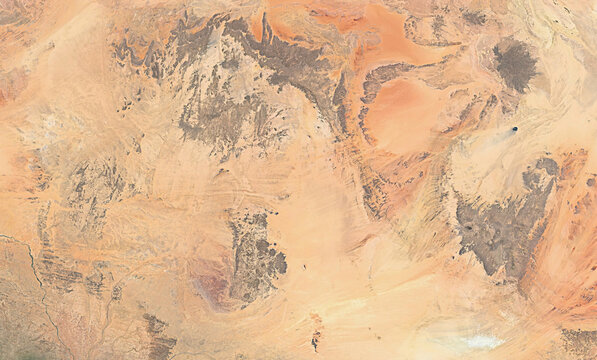

In [ ]:
img=imread('/content/drive/MyDrive/360_F_402929364_phHRY0XwYwh2OtmgqDmHEiQcPd22NB72.jpg')
img

In [ ]:
img=resize(img,(150,150,1))
img.shape

(150, 150, 1)

In [ ]:
img=img.reshape(1,150,150,1)
img.shape

(1, 150, 150, 1)

In [ ]:
pred=model.predict(img)
pred

1/1 [==============================] - 0s 169ms/step


array([[1.01578516e-10, 7.69096550e-06, 8.48247817e-33, 9.99992251e-01]],
      dtype=float32)

In [ ]:
index=pred.argmax(axis=1)
index

array([3])

In [ ]:
li[index.item()]

'desert'

In [ ]:
import pickle
pickle.dump(model,open('model.sav','wb'))